In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
#matplotlib inline
#解析xml文件
from lxml import etree
import numpy as np
import glob
#引入矩形框
from matplotlib.patches import Rectangle

In [2]:
img = tf.io.read_file('./dataset/animal_images/Abyssinian_1.jpg')

In [3]:
img = tf.image.decode_jpeg(img)

In [4]:
img.shape

TensorShape([400, 600, 3])

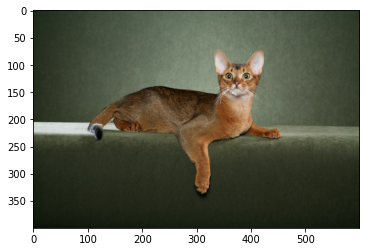

In [5]:
plt.imshow(img)

In [6]:
xml = open('./dataset/annotations/xmls/Abyssinian_1.xml').read()

In [7]:
sel = etree.HTML(xml)

In [8]:
width = int(sel.xpath('//size/width/text()')[0])

In [9]:
width

600

In [10]:
height = int(sel.xpath('//size/height/text()')[0])

xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
ymax = int(sel.xpath('//bndbox/ymax/text()')[0])

In [11]:
height, xmin, xmax, ymin, ymax

(400, 333, 425, 72, 158)

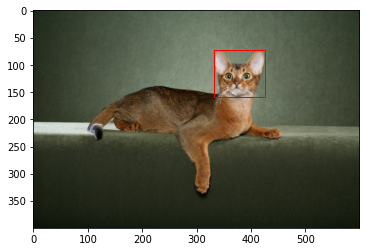

In [12]:
plt.imshow(img)
#矩形框：给定左下角坐标和宽、高、角度
rect = plt.Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill=False, color='red')
#需要画在当前图像上，获取当前图像
#gca = get current array
ax = plt.gca()
ax.axes.add_patch(rect)

In [13]:
img = tf.image.resize(img, [224, 224])
img = img/255

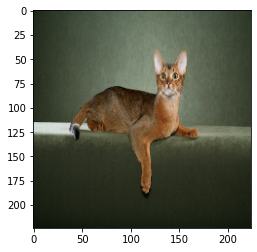

In [14]:
plt.imshow(img)

In [15]:
xmin = (xmin / width) * 224
xmax = (xmax / width) * 224
ymin = (ymin / height) * 224
ymax = (ymax / height) * 224

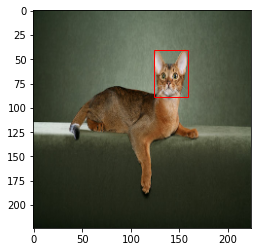

In [16]:
plt.imshow(img)
#矩形框：给定左下角坐标和宽、高、角度
rect = plt.Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill=False, color='red')
#需要画在当前图像上，获取当前图像
#gca = get current array
ax = plt.gca()
ax.axes.add_patch(rect)

# 创建输入管道

In [17]:
images = glob.glob('./dataset/animal_images/*.jpg')

In [18]:
images[:5] , images[-5:]

(['./dataset/animal_images\\Abyssinian_1.jpg',
  './dataset/animal_images\\Abyssinian_10.jpg',
  './dataset/animal_images\\Abyssinian_100.jpg',
  './dataset/animal_images\\Abyssinian_101.jpg',
  './dataset/animal_images\\Abyssinian_102.jpg'],
 ['./dataset/animal_images\\yorkshire_terrier_95.jpg',
  './dataset/animal_images\\yorkshire_terrier_96.jpg',
  './dataset/animal_images\\yorkshire_terrier_97.jpg',
  './dataset/animal_images\\yorkshire_terrier_98.jpg',
  './dataset/animal_images\\yorkshire_terrier_99.jpg'])

In [19]:
len(images)

7390

In [20]:
xmls = glob.glob('./dataset/annotations/xmls/*.xml')

In [21]:
xmls[:3], xmls[-3:]

(['./dataset/annotations/xmls\\Abyssinian_1.xml',
  './dataset/annotations/xmls\\Abyssinian_10.xml',
  './dataset/annotations/xmls\\Abyssinian_100.xml'],
 ['./dataset/annotations/xmls\\yorkshire_terrier_188.xml',
  './dataset/annotations/xmls\\yorkshire_terrier_189.xml',
  './dataset/annotations/xmls\\yorkshire_terrier_190.xml'])

In [22]:
len(xmls)

3686

In [23]:
xmls[0].split('\\')[-1].split('.xml')[0]

'Abyssinian_1'

In [24]:
names = [x.split('\\')[-1].split('.xml')[0] for x in xmls]

In [25]:
len(names)

3686

In [26]:
images_train = [img for img in images 
                if (img.split('\\')[-1].split('.jpg')[0] in names)]

In [27]:
images_train[:3], images_train[-3:]

(['./dataset/animal_images\\Abyssinian_1.jpg',
  './dataset/animal_images\\Abyssinian_10.jpg',
  './dataset/animal_images\\Abyssinian_100.jpg'],
 ['./dataset/animal_images\\yorkshire_terrier_188.jpg',
  './dataset/animal_images\\yorkshire_terrier_189.jpg',
  './dataset/animal_images\\yorkshire_terrier_190.jpg'])

In [28]:
len(images_train)

3686

In [29]:
#排序
images_train.sort(key = lambda x:x.split('\\')[-1].split('.jpg')[0])

In [30]:
xmls.sort(key = lambda x:x.split('\\')[-1].split('.xml')[0])

In [31]:
images_train[:3], images_train[-3:]

(['./dataset/animal_images\\Abyssinian_1.jpg',
  './dataset/animal_images\\Abyssinian_10.jpg',
  './dataset/animal_images\\Abyssinian_100.jpg'],
 ['./dataset/animal_images\\yorkshire_terrier_188.jpg',
  './dataset/animal_images\\yorkshire_terrier_189.jpg',
  './dataset/animal_images\\yorkshire_terrier_190.jpg'])

In [32]:
xmls[:3], xmls[-3:]

(['./dataset/annotations/xmls\\Abyssinian_1.xml',
  './dataset/annotations/xmls\\Abyssinian_10.xml',
  './dataset/annotations/xmls\\Abyssinian_100.xml'],
 ['./dataset/annotations/xmls\\yorkshire_terrier_188.xml',
  './dataset/annotations/xmls\\yorkshire_terrier_189.xml',
  './dataset/annotations/xmls\\yorkshire_terrier_190.xml'])

In [33]:
def to_labels(path):
    xml = open('{}'.format(path)).read()
    sel = etree.HTML(xml)
    
    width = int(sel.xpath('//size/width/text()')[0])
    height = int(sel.xpath('//size/height/text()')[0])
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [xmin / width, ymin / height, xmax / width, ymax / height]

In [34]:
labels = [to_labels(path) for path in xmls]

In [35]:
labels[:3]

[[0.555, 0.18, 0.7083333333333334, 0.395],
 [0.192, 0.21, 0.768, 0.582],
 [0.383248730964467, 0.142, 0.850253807106599, 0.534]]

In [36]:
out1, out2, out3, out4 = list(zip(*labels))

In [37]:
out1

(0.555,
 0.192,
 0.383248730964467,
 0.12,
 0.046,
 0.482,
 0.474,
 0.560546875,
 0.188,
 0.1,
 0.2872340425531915,
 0.22395833333333334,
 0.0625,
 0.596,
 0.22857142857142856,
 0.46875,
 0.346875,
 0.476,
 0.2132132132132132,
 0.144,
 0.003003003003003003,
 0.13,
 0.28059701492537314,
 0.23595505617977527,
 0.2809917355371901,
 0.65,
 0.306,
 0.26426426426426425,
 0.43,
 0.176,
 0.3609022556390977,
 0.092,
 0.34234234234234234,
 0.5918367346938775,
 0.27927927927927926,
 0.05466237942122187,
 0.4,
 0.09,
 0.148,
 0.06006006006006006,
 0.3153153153153153,
 0.370625,
 0.5,
 0.212,
 0.48955223880597015,
 0.462,
 0.07592190889370933,
 0.336,
 0.32,
 0.182,
 0.2875,
 0.11711711711711711,
 0.606,
 0.31,
 0.033542976939203356,
 0.32,
 0.4657142857142857,
 0.3632075471698113,
 0.692,
 0.278,
 0.09982788296041308,
 0.566,
 0.174,
 0.308,
 0.08524590163934426,
 0.75,
 0.548,
 0.35,
 0.378,
 0.048,
 0.09333333333333334,
 0.31629392971246006,
 0.0925,
 0.14,
 0.13818181818181818,
 0.561875,
 0.65

In [38]:
len(out1)

3686

In [39]:
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
out4 = np.array(out4)

In [40]:
label_datasets = tf.data.Dataset.from_tensor_slices((out1, out2, out3, out4))

In [41]:
label_datasets

<TensorSliceDataset shapes: ((), (), (), ()), types: (tf.float64, tf.float64, tf.float64, tf.float64)>

In [42]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels = 3)
    img = tf.image.resize(img, [224, 224])
    #归一化：让img在[-1, 1]区间
    img = img / 127.5 - 1
    return img

In [43]:
image_dataset = tf.data.Dataset.from_tensor_slices(images_train)

In [44]:
image_dataset = image_dataset.map(load_image)

In [45]:
image_dataset

<MapDataset shapes: (224, 224, 3), types: tf.float32>

In [46]:
dataset = tf.data.Dataset.zip((image_dataset, label_datasets))

In [47]:
dataset

<ZipDataset shapes: ((224, 224, 3), ((), (), (), ())), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

In [48]:
test_count = int(len(images_train) * 0.2)

In [49]:
test_count

737

In [50]:
train_count = len(images_train) - test_count

In [51]:
dataset_train = dataset.skip(test_count)

In [52]:
dataset_test = dataset.take(test_count)

In [53]:
dataset_train = dataset_train.repeat().shuffle(train_count).batch(32)

In [54]:
dataset_test = dataset_test.batch(32)

In [55]:
dataset_test

<BatchDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64))>

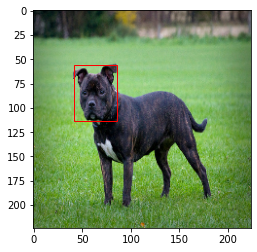

In [56]:
for img, label in dataset_train.take(1):
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    out1, out2, out3, out4 = label
    xmin, ymin, xmax, ymax = out1[0].numpy()*224, out2[0].numpy()*224, out3[0].numpy()*224, out4[0].numpy()*224
    rect = plt.Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill=False, color='red')
    ax = plt.gca()
    ax.axes.add_patch(rect)
    plt.show()

# 创建图像定位模型

In [57]:
xception = tf.keras.applications.Xception(weights = 'imagenet',
                                          include_top = False,
                                          input_shape = (224, 224, 3))

In [58]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))

x = xception(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2048, activation = 'relu')(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)

out1 = tf.keras.layers.Dense(1)(x)
out2 = tf.keras.layers.Dense(1)(x)
out3 = tf.keras.layers.Dense(1)(x)
out4 = tf.keras.layers.Dense(1)(x)

prediction = [out1, out2, out3, out4]

model = tf.keras.models.Model(inputs = inputs, outputs = prediction)

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Model)                (None, 7, 7, 2048)   20861480    input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 2048)         0           xception[1][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         4196352     global_average_pooling2d[0][0]   
______________________________________________________________________________________________

In [68]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'mse',
              metrics = ['mae'])

In [69]:
EPOCHS = 50

In [60]:
history = model.fit(dataset_train,
                    epochs = EPOCHS,
                    steps_per_epoch = train_count//32,
                    validation_steps = test_count//32,
                    validation_data = dataset_test
)

Train for 92 steps, validate for 23 steps
Epoch 1/50
92/92 [==============================] - 62s 673ms/step - loss: 0.0952 - dense_2_loss: 0.0193 - dense_3_loss: 0.0133 - dense_4_loss: 0.0268 - dense_5_loss: 0.0358 - dense_2_mae: 0.1069 - dense_3_mae: 0.0872 - dense_4_mae: 0.1244 - dense_5_mae: 0.1315 - val_loss: 0.5546 - val_dense_2_loss: 0.1080 - val_dense_3_loss: 0.0728 - val_dense_4_loss: 0.2258 - val_dense_5_loss: 0.1481 - val_dense_2_mae: 0.2905 - val_dense_3_mae: 0.2472 - val_dense_4_mae: 0.4341 - val_dense_5_mae: 0.3555
Epoch 2/50
92/92 [==============================] - 39s 423ms/step - loss: 0.0340 - dense_2_loss: 0.0089 - dense_3_loss: 0.0058 - dense_4_loss: 0.0094 - dense_5_loss: 0.0098 - dense_2_mae: 0.0732 - dense_3_mae: 0.0591 - dense_4_mae: 0.0751 - dense_5_mae: 0.0771 - val_loss: 0.1682 - val_dense_2_loss: 0.0567 - val_dense_3_loss: 0.0147 - val_dense_4_loss: 0.0608 - val_dense_5_loss: 0.0360 - val_dense_2_mae: 0.2111 - val_dense_3_mae: 0.1008 - val_dense_4_mae: 0.213

92/92 [==============================] - 39s 421ms/step - loss: 0.0030 - dense_2_loss: 6.4080e-04 - dense_3_loss: 4.9066e-04 - dense_4_loss: 9.8210e-04 - dense_5_loss: 9.1503e-04 - dense_2_mae: 0.0197 - dense_3_mae: 0.0171 - dense_4_mae: 0.0247 - dense_5_mae: 0.0236 - val_loss: 0.0151 - val_dense_2_loss: 0.0043 - val_dense_3_loss: 0.0023 - val_dense_4_loss: 0.0055 - val_dense_5_loss: 0.0030 - val_dense_2_mae: 0.0468 - val_dense_3_mae: 0.0355 - val_dense_4_mae: 0.0510 - val_dense_5_mae: 0.0390
Epoch 34/50
92/92 [==============================] - 39s 422ms/step - loss: 0.0024 - dense_2_loss: 5.5967e-04 - dense_3_loss: 5.1124e-04 - dense_4_loss: 6.5430e-04 - dense_5_loss: 6.5678e-04 - dense_2_mae: 0.0187 - dense_3_mae: 0.0178 - dense_4_mae: 0.0199 - dense_5_mae: 0.0200 - val_loss: 0.0144 - val_dense_2_loss: 0.0038 - val_dense_3_loss: 0.0029 - val_dense_4_loss: 0.0048 - val_dense_5_loss: 0.0029 - val_dense_2_mae: 0.0439 - val_dense_3_mae: 0.0419 - val_dense_4_mae: 0.0471 - val_dense_5_mae:

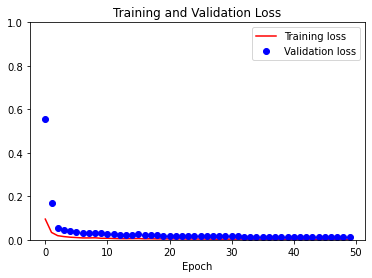

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'bo', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend()
plt.show()

# 模型保存

In [62]:
model.save('E:\TF_project\learn\model\detect_locate_v1.h5')

In [71]:
new_model = tf.keras.models.load_model('E:\TF_project\learn\models\detect_locate_v1.h5')

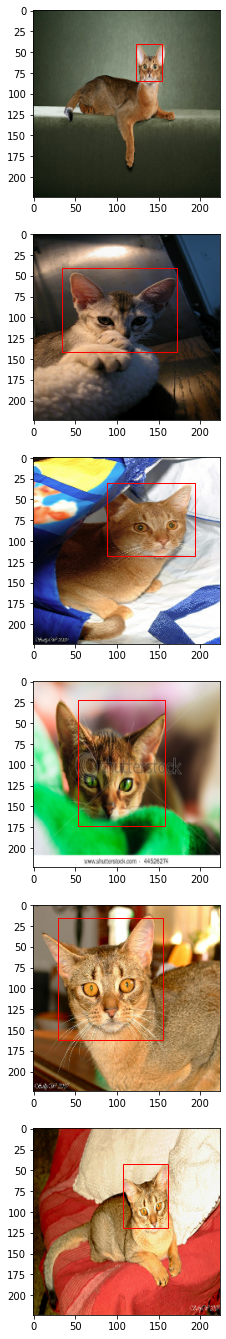

In [72]:
plt.figure(figsize=(8, 24))
for img, _ in dataset_test.take(1):
    out1, out2, out3, out4 = new_model.predict(img)
    for i in range(6):
        plt.subplot(6, 1, i+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(img[i]))
        xmin, ymin, xmax, ymax = out1[i] * 224, out2[i] * 224,out3[i] * 224,out4[i] * 224,
        rect = plt.Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill=False, color='red')
        ax = plt.gca()
        ax.axes.add_patch(rect)